In [63]:
import pandas as pd
import numpy as np

In [ ]:
# TODO 

# Restructure the entire project.

#Ground 0, point of return

In [64]:
df=pd.read_csv('Data_Train.csv')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [65]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [66]:
df.dropna()
df.dropna(subset=['Seats'],inplace=True)
df.dropna(subset=['Mileage'],inplace=True)



df=df.drop(['Location'],axis=1)
df=df.reset_index()
df=df.drop(['index'],axis=1)
df.isnull().sum()

Name                 0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [67]:
df['Mileage']=df['Mileage'].astype(str)
df['Engine']=df['Engine'].astype(str)
df['Power']=df['Power'].astype(str)
df['Mileage']=df['Mileage'].str.replace('kmpl','')
df['Mileage']=df['Mileage'].str.replace('km/kg','')
df['Engine']=df['Engine'].str.replace('CC','')
df['Power']=df['Power'].str.replace('bhp','')



df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
5972,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
5973,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [68]:
df['feature_mfg_date']='New'

df['feature_mfg_date']=np.where((df.Year<2011),'old',df.feature_mfg_date)
df['feature_mfg_date']=np.where((df.Year>=2011),'like new',df.feature_mfg_date)
df['feature_mfg_date']=np.where((df.Year>2015),'new',df.feature_mfg_date)

df.head(100)


,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,feature_mfg_date
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,old
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,like new
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,like new
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,like new
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,like new
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Honda Amaze SX i-DTEC,2015,30000,Diesel,Manual,First,25.8,1498,98.6,5.0,3.50,like new
96,Volkswagen Polo Diesel Highline 1.2L,2013,34212,Diesel,Manual,First,22.07,1199,73.9,5.0,2.79,like new
97,Hyundai Verna Transform SX VGT CRDi,2010,70002,Diesel,Manual,First,16.2,1493,110,5.0,3.45,old
98,Maruti Wagon R VXI BS IV,2016,62000,Petrol,Manual,First,18.9,998,67.1,5.0,4.45,new


In [69]:
df=df.drop([4446,76,4413,4864,4863])

In [70]:
df['Power']=df['Power'].astype(str)
drop=df.loc[df.Power.str.contains('null ')].index

df.drop(drop,inplace=True)
df=df[df['Kilometers_Driven']<150000]
df=df[df['Kilometers_Driven']>=10000]
df=df[df['Mileage']!=0]


In [71]:
df['Mileage']=pd.to_numeric(df['Mileage'],downcast='float')
df['Engine']=pd.to_numeric(df['Engine'],downcast='float')
df['Power']=pd.to_numeric(df['Power'],downcast='float')
null_values=df[df['Mileage']==0].index
df.drop(null_values,inplace=True)

In [72]:
df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,feature_mfg_date
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.600000,998.0,58.160000,5.0,1.75,old
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.199997,5.0,12.50,like new
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.200001,1199.0,88.699997,5.0,4.50,like new
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.760002,7.0,6.00,like new
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.800003,5.0,17.74,like new
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.400000,1248.0,74.000000,5.0,4.75,like new
5971,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.400000,1120.0,71.000000,5.0,4.00,like new
5972,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.000000,2498.0,112.000000,8.0,2.90,like new
5973,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.900000,998.0,67.099998,5.0,2.65,like new


In [73]:
df['Kilometers_Driven'].min()

10000

In [74]:
df['condition']='Excellent'

In [75]:
df['condition']=np.where((df.Kilometers_Driven<20000),'excellent',df.condition)
df['condition']=np.where((df.Kilometers_Driven>=20000)&(df.feature_mfg_date=='old'),'good',df.condition)
df['condition']=np.where((df.Kilometers_Driven>60000)&(df.feature_mfg_date=='old'),'good',df.condition)
df['condition']=np.where((df.Kilometers_Driven>80000)&(df.feature_mfg_date=='old'),'salavage',df.condition)
df['condition']=np.where((df.Kilometers_Driven>=20000)&(df.feature_mfg_date=='like new'),'good',df.condition)
df['condition']=np.where((df.Kilometers_Driven>60000)&(df.feature_mfg_date=='like_new'),'fair',df.condition)

df['condition']=np.where((df.Kilometers_Driven>=20000)&(df.feature_mfg_date=='new'),'excellent',df.condition)

df['condition']=np.where((df.Kilometers_Driven>100000),'salavage',df.condition)





In [76]:
df['condition']=np.where((df.condition=='excellent')&(df.Owner_Type=='First'),'excellent',df.condition)
df['condition']=np.where((df.condition=='excellent')&(df.Owner_Type=='Second'),'good',df.condition)
df['condition']=np.where((df.condition=='good')&(df.Owner_Type=='First'),'good',df.condition)
df['condition']=np.where((df.condition=='good')&(df.Owner_Type=='Second'),'fair',df.condition)
df['condition']=np.where((df.condition=='fair')&(df.Owner_Type=='First'),'fair',df.condition)
df['condition']=np.where((df.condition=='fair')&(df.Owner_Type=='Second'),'fair',df.condition)
df['condition']=np.where((df.condition=='salavage')&(df.Owner_Type=='First'),'salavage',df.condition)
df['condition']=np.where((df.condition=='salavage')&(df.Owner_Type=='Second'),'salavage',df.condition)
df['condition']=np.where((df.condition=='excellent')&(df.Engine<2000),'good',df.condition)
df['condition']=np.where((df.condition=='good')&(df.Engine<1000),'fair',df.condition)
df['condition']=np.where((df.condition=='fair')&(df.Power>290),'excellent',df.condition)





In [77]:
df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,feature_mfg_date,condition
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.600000,998.0,58.160000,5.0,1.75,old,fair
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.199997,5.0,12.50,like new,good
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.200001,1199.0,88.699997,5.0,4.50,like new,good
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.760002,7.0,6.00,like new,good
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.800003,5.0,17.74,like new,fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.400000,1248.0,74.000000,5.0,4.75,like new,good
5971,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.400000,1120.0,71.000000,5.0,4.00,like new,good
5972,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.000000,2498.0,112.000000,8.0,2.90,like new,fair
5973,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.900000,998.0,67.099998,5.0,2.65,like new,fair


In [78]:
df[df.Price==df.Price.max()]

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,feature_mfg_date,condition
4048,Land Rover Range Rover 3.0 Diesel LWB Vogue,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0,new,excellent


# EDA (Exploratory Data Analysis)

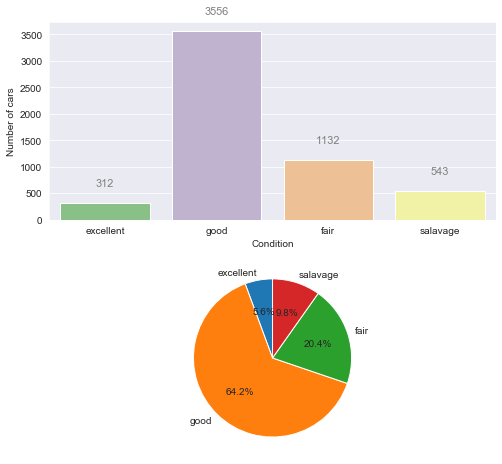

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
f, axes = plt.subplots (2,1, figsize=(8,8))
x=['excellent','good','fair','salavage']
y=[df.condition[(df['condition']=='excellent')].count(),df.condition[(df['condition']=='good')].count(),\
     df.condition[(df['condition']=='fair')].count(),df.condition[(df['condition']=='salavage')].count()]
vis1= sns.barplot(x,y,palette='Accent',ax=axes[0])
vis1.set(xlabel='Condition',ylabel='Number of cars')
for p in vis1.patches:
             vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
NG = [df.condition[(df['condition']=='excellent')].count(),df.condition[(df['condition']=='good')].count(),\
     df.condition[(df['condition']=='fair')].count(),df.condition[(df['condition']=='salavage')].count()]
G = ['excellent','good','fair','salavage']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.show()


plt.ioff()

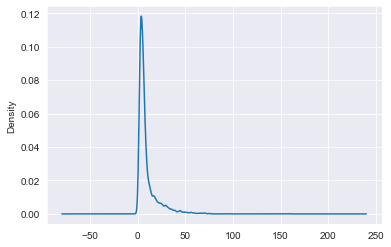

In [80]:
df['Price'].plot.kde(bw_method=0.1)


# Test and Hypothesis

# Kilometers Driven vs Price

*null hypothesis(H0):There is significant relation between Kilometers Driven and Price
*Alternative Hypothesis(H):There is significant relation between Kilometers Driven and Price

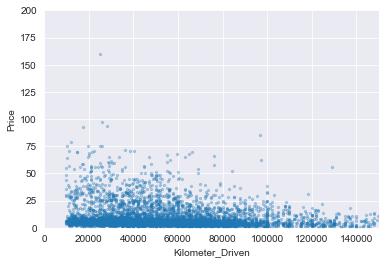

In [81]:
plt.scatter(df.Kilometers_Driven, df.Price, alpha=0.3, s=5) 

plt.xlim(0, 150000)
plt.ylim(0, 200)

plt.xlabel('Kilometer_Driven')
plt.ylabel('Price')
plt.show()

In [82]:
import scipy.stats
scipy.stats.levene(df['Price'],df['Kilometers_Driven'])

LeveneResult(statistic=8941.42863792451, pvalue=0.0)

In [83]:
scipy.stats.ttest_ind(df['Price'],df['Kilometers_Driven'],equal_var=False)

Ttest_indResult(statistic=-150.83678466959512, pvalue=0.0)

In [84]:
scipy.stats.shapiro(df['Price'])

(0.6521393656730652, 0.0)

In [85]:
#independent t-test
import researchpy as rp
des,results=rp.ttest(df['Kilometers_Driven'],df['Price'])
des

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Kilometers_Driven,5543.0,55809.817788,27542.411992,369.938500,55084.593265,56535.042312
1,Price,5543.0,9.479594,10.879789,0.146133,9.193116,9.766072
2,combined,11086.0,27909.648691,34025.692206,323.161438,27276.194745,28543.102637


In [86]:
results

,Independent t-test,results
0,Difference (Kilometers_Driven - Price) =,55800.3382
1,Degrees of freedom =,11084.0000
2,t =,150.8368
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,2.8652
7,Hedge's g =,2.8650
8,Glass's delta =,2.0260
9,r =,0.8200


*Correlation is 0.8200 which means there is strong correlation between Kilometers Driven and Price.
*Hence we reject null hypothesis
*Therefore Alternate hypothesis is accepted there is significant relation between Kilometers Driven and Price

# condition Vs Price

*null hypothesis(H0):There is significant relation between condition and Price
*Alternative Hypothesis(H):There is significant relation between condition and Price

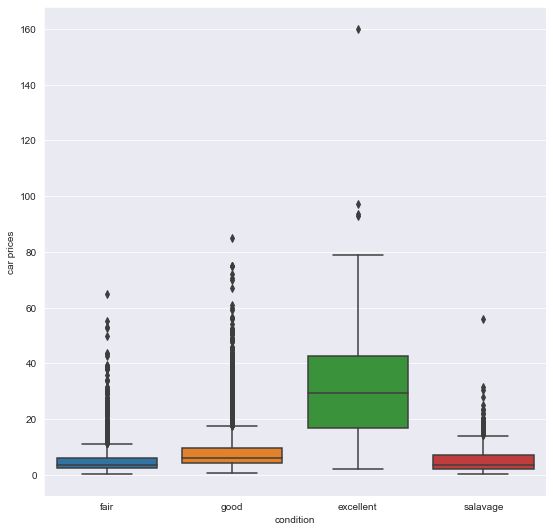

In [87]:
f = plt.subplots ( figsize=(9,9))

vis1 = sns.boxplot( data = df, x = 'condition', y = 'Price',  )
vis1.set(xlabel='condition',ylabel='car prices')
plt.ioff()

In [88]:
df.groupby('condition')['Price'].describe()


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
excellent,312.0,31.811891,19.284879,2.02,16.725,29.350,42.7000,160.00
fair,1132.0,6.074488,7.348606,0.44,2.500,3.500,5.9025,64.75
good,3556.0,9.188034,8.966223,0.70,4.250,6.115,9.5800,85.00
salavage,543.0,5.655820,5.517087,0.45,2.250,3.650,7.0000,56.00


In [89]:
df.groupby('condition')['Price'].describe()


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
excellent,312.0,31.811891,19.284879,2.02,16.725,29.350,42.7000,160.00
fair,1132.0,6.074488,7.348606,0.44,2.500,3.500,5.9025,64.75
good,3556.0,9.188034,8.966223,0.70,4.250,6.115,9.5800,85.00
salavage,543.0,5.655820,5.517087,0.45,2.250,3.650,7.0000,56.00


In [90]:
import researchpy as rp
rp.summary_cont(df.groupby('condition')['Price'])

,N,Mean,SD,SE,95% Conf.,Interval
condition,,,,,,
excellent,312,31.811891,19.284879,1.091791,29.668543,33.955240
fair,1132,6.074488,7.348606,0.218415,5.646206,6.502770
good,3556,9.188034,8.966223,0.150359,8.893290,9.482779
salavage,543,5.655820,5.517087,0.236761,5.191340,6.120299


In [91]:
#test for auto correlation
import statsmodels.formula.api as smf
dat= smf.ols('Price ~ condition',df).fit()
dat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     682.1
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:24:06   Log-Likelihood:                -20224.
No. Observations:                5543   AIC:                         4.046e+04
Df Residuals:                    5539   BIC:                         4.048e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                31.8119      0.526     60.423      0.000      30.780      32.844
condition[T.fair]       -25.7374      0.595    -43.283      0.000     -26.903     -24.572
condition[T.good]       -22.6239      0.549    -41.202      0.000     -23.700     -21.547
condition[T.salavage]   -26.1561      0.661    -39.591      0.000     -27.451     -24.861
==============================================================================
Omnibus:                     3629.128   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64046.310
Skew:                           2.875   Prob(JB):                         0.00
Kurtosis:                      18.628   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
dat.pvalues

Intercept                 0.000000e+00
condition[T.fair]         0.000000e+00
condition[T.good]         0.000000e+00
condition[T.salavage]    4.330343e-302
dtype: float64

Durbin_Watson value is 1.976 .
Durbin_Watson range (0,2)---Positive correlation.
1.976 is weak positive .
So, we cannot reject null hypothesis.
There might be non linear relation between condition and Price.
There is no significant relation between condition and Price.

# MODEL BUILDING

In [93]:
# selecting columns with object data type
s=df.dtypes=='object'
obj_col=list(s[s].index)
obj_col=obj_col[1:]
obj_col

['Fuel_Type', 'Transmission', 'Owner_Type', 'feature_mfg_date', 'condition']

In [94]:
# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfcpy=df.copy()
for i in obj_col:
    dfcpy[i]=le.fit_transform(df[i])
    

In [95]:
X=dfcpy[['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage',
    'Engine','Power','Seats']]

In [96]:
y=dfcpy[['Price']]

In [97]:
from sklearn.model_selection import train_test_split as ttt
X_train,X_test,y_train,y_test=ttt(X,y,train_size=0.7,random_state=100)

## Random Forest Regression

In [98]:
from sklearn.ensemble import RandomForestRegressor
cls=RandomForestRegressor(random_state=100)
cls.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [99]:
y_pred=cls.predict(X_test)

In [100]:
#from sklearn.metrics import confusion_matrix, accuracy_score
#print(cmm=confusion_matrix(y_test,y_pred))
#acc=accuracy_score(y_test,y_pred)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error  -->',rmse)
print('Mean Absolute Error -->',mae)
print('R Square Score      -->',r2)

Mean Squared Error  --> 15.585606197562184
Mean Absolute Error --> 1.6412863241989522
R Square Score      --> 0.8768983446169635


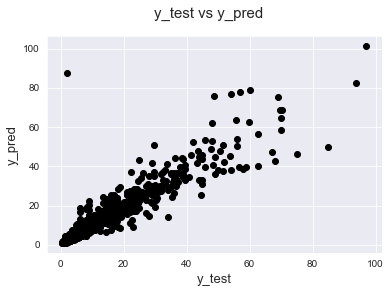

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,color='black')
fig.suptitle('y_test vs y_pred', fontsize=15)              # Plot heading 
plt.xlabel('y_test', fontsize=13)                          # X-label
plt.ylabel('y_pred', fontsize=13)                          # Y-label
plt.show()

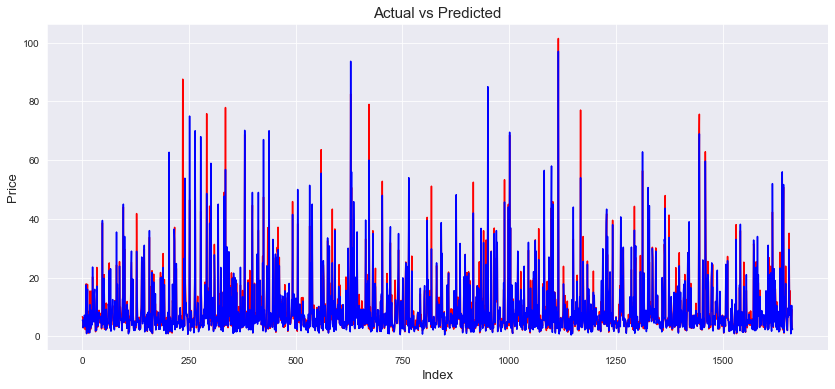

In [102]:
c=[i for i in range(1,1664,1)]
plt.figure(figsize=(14,6))
plt.plot(c,y_pred,color='r')
plt.plot(c,y_test,color='b')
plt.title('Actual vs Predicted',fontsize=15)
plt.xlabel('Index',fontsize=13)
plt.ylabel('Price',fontsize=13)  
plt.show()

# Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression
cls=LinearRegression()
cls.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
y_train_predict=cls.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2=r2_score(y_train,y_train_predict)
print('RMSE is {}',format(rmse))
print('R2 score is {}',format(r2))
print('\n')
y_test_predict=cls.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2=r2_score(y_test,y_test_predict)
print('RMSE is {}',format(rmse))
print('R2 score is {}',format(r2))

RMSE is {} 5.931932647756507
R2 score is {} 0.6935012686443476


RMSE is {} 6.099190597532008
R2 score is {} 0.7061778010914941


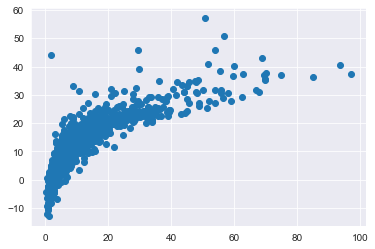

In [105]:
plt.scatter(y_test,y_test_predict)
plt.show()

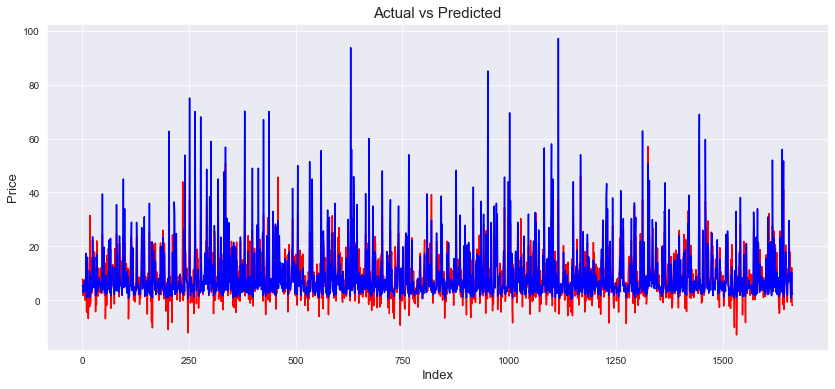

In [106]:
c=[i for i in range(1,1664,1)]
plt.figure(figsize=(14,6))
plt.plot(c,y_test_predict,color='r')
plt.plot(c,y_test,color='b')
plt.title('Actual vs Predicted',fontsize=15)
plt.xlabel('Index',fontsize=13)
plt.ylabel('Price',fontsize=13)  
plt.show()

Conclusion:
Random Forrest is the best model for the data set

# Test Dataset

## Data pre-processing

In [107]:
df_test=pd.read_csv('Data_Test.csv')
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [108]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [109]:
df_test=df_test.dropna()

In [110]:
df_test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [111]:

df_test.drop(['Location'],axis=1)
df_test=df_test.reset_index()
df_test=df_test.drop(['index'],axis=1)


In [112]:
df_test['Mileage']=df_test['Mileage'].astype(str)
df_test['Engine']=df_test['Engine'].astype(str)
df_test['Power']=df_test['Power'].astype(str)
df_test['Mileage']=df_test['Mileage'].str.replace('kmpl','')
df_test['Mileage']=df_test['Mileage'].str.replace('km/kg','')
df_test['Engine']=df_test['Engine'].str.replace('CC','')
df_test['Power']=df_test['Power'].str.replace('bhp','')



In [113]:
df_test['Power']=df_test['Power'].astype(str)
drop=df_test.loc[df_test.Power.str.contains('null ')].index
#drop1=df_test.loc[df_test.Power.str.contains('NaN ')].index
df_test.drop(drop,inplace=True)
#df_test.drop(drop1,inplace=True)
df_test=df_test[df_test['Kilometers_Driven']<150000]
df_test=df_test[df_test['Kilometers_Driven']>=10000]
df_test=df_test[df_test['Mileage']!=0]


In [114]:
df_test['Mileage']=pd.to_numeric(df['Mileage'],downcast='float')
df_test['Engine']=pd.to_numeric(df['Engine'],downcast='float')
df_test['Power']=pd.to_numeric(df['Power'],downcast='float')
null_values=df_test[df_test['Mileage']==0].index
df_test.drop(null_values,inplace=True)


In [115]:
df_test=df_test.dropna(how='any',subset=['Mileage','Engine','Power'])


In [116]:
df_test.shape

(1048, 11)

In [117]:
#selecting col with object data type
q=df_test.dtypes=='object'
cols_obj=list(q[q].index)
cols_obj=cols_obj[2:]
cols_obj

['Fuel_Type', 'Transmission', 'Owner_Type']

In [118]:
#label encoding
df_test_cpy=df_test.copy()
for i in cols_obj:
    df_test_cpy[i]=le.fit_transform(df_test[i])

In [119]:
Xx_test=df_test_cpy[['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage',
    'Engine','Power','Seats']]

In [120]:
Xx_test.head(3)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,2014,40929,0,1,0,26.600000,998.0,58.160000,4.0
1,2013,54493,3,1,2,19.670000,1582.0,126.199997,5.0
2,2017,34000,1,1,0,18.200001,1199.0,88.699997,7.0


In [121]:
np.where(np.isnan(X_test))

(array([], dtype=int64), array([], dtype=int64))

In [122]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

# Implementation of  RandomForest using scikit

In [123]:
from sklearn.ensemble import RandomForestRegressor
regr_test=RandomForestRegressor(random_state=100)
regr_test.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [124]:
ytest_pred=regr_test.predict(Xx_test)

In [125]:
ytest_pred[0:20]

array([ 3.2399    ,  5.4098    ,  7.3383    , 10.09405   ,  3.099     ,
        3.6587    , 17.8366    ,  4.0171    ,  4.458     ,  3.9823    ,
        8.3506    ,  1.9688    , 12.023     , 14.9604    ,  5.0157    ,
        3.22306667,  7.5363    , 27.4663    ,  3.103     , 25.659     ])

In [128]:
df_test['Price']=ytest_pred

# Result: The predicted prices of the cars

In [129]:
df_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,26.600000,998.0,58.160000,4.0,3.23990
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,19.670000,1582.0,126.199997,5.0,5.40980
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,18.200001,1199.0,88.699997,7.0,7.33830
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,15.200000,1968.0,140.800003,5.0,10.09405
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,21.100000,814.0,55.200001,7.0,3.09900
...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.540001,1598.0,103.599998,5.0,3.68230
1219,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.299999,993.0,60.000000,5.0,3.43720
1220,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,16.100000,796.0,37.000000,5.0,2.06730
1221,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,14.280000,1798.0,138.029999,5.0,7.74470
